## Trabalho 3ª unidade - Daniel Sehn Colao
## Tema: Previsão de Problemas Cardíacos

In [589]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf

## Coleta de dados

In [590]:
dfc = pd.read_csv('heart_2020_cleaned.csv')
dfc.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Pré-processamento de dados

In [591]:
print(dfc.info())
print(dfc.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Pré-processamento - Data Cleaning

### Remoção de amostras duplicadas

In [592]:
print(f'Number of duplicated records = {dfc.duplicated().sum()}')

Number of duplicated records = 18078


In [593]:
dfc = dfc.drop_duplicates()

In [594]:
print(f'Number of duplicated records = {dfc.duplicated().sum()}')

Number of duplicated records = 0


### Identificação de valores ausentes (missing values)

In [595]:
dfc.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

### Verificação e eliminação de outliers

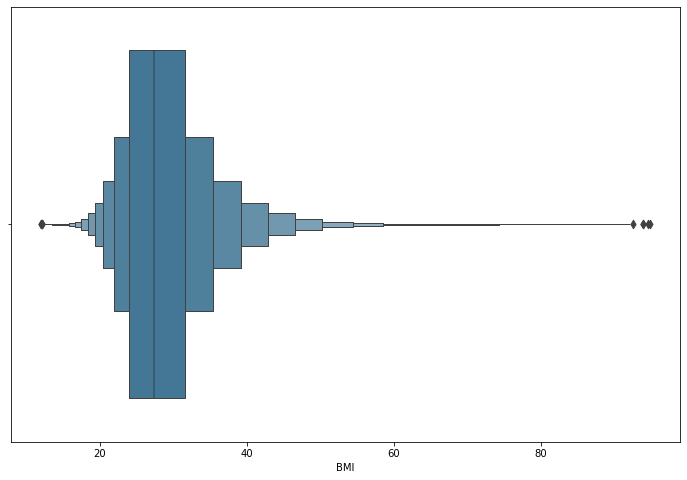

In [596]:
plt.figure(figsize=(12,8))
sns.boxenplot(x=dfc.BMI, palette='mako')
plt.show()

In [597]:
q_low = dfc["BMI"].quantile(0.01)
q_hi  = dfc["BMI"].quantile(0.99)
print('Total de amostras: ', len(dfc))

dfc = dfc[(dfc["BMI"] < q_hi) & (dfc["BMI"] > q_low)]
print('Total de amostras após remoção de outliers: ', len(dfc))

Total de amostras:  301717
Total de amostras após remoção de outliers:  295664


## Pré-processamento: Eliminação do atributo Race

Este atributo será eliminado devido sua irrelevância e por questões éticas.

In [598]:
dfc = dfc.drop('Race', axis=1)

### Histogramas

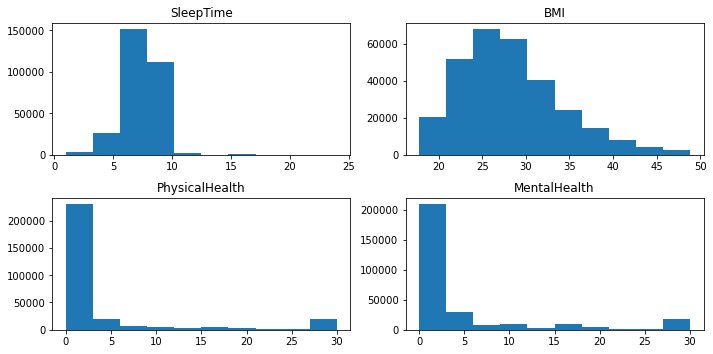

In [599]:
#criação de subplots 3x4 (3 linhas com 4 graficos cada)
fig, ax = plt.subplots(2, 2, figsize=(10,5))

ax[0,0].hist(dfc.SleepTime)
ax[0,0].set_title('SleepTime')

ax[0,1].hist(dfc.BMI)
ax[0,1].set_title('BMI')

ax[1,0].hist(dfc.PhysicalHealth)
ax[1,0].set_title('PhysicalHealth')

ax[1,1].hist(dfc.MentalHealth)
ax[1,1].set_title('MentalHealth')

#espaçamento entre os graficos
fig.tight_layout(pad=1.0)

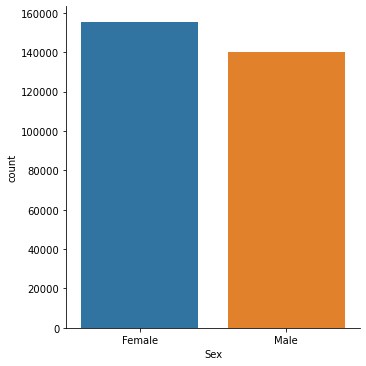

In [600]:
sns.catplot(data=dfc, x="Sex", kind="count")

In [601]:
male_disease = dfc.loc[dfc['Sex'] == 'Male']
male_disease = male_disease.loc[male_disease['HeartDisease'] == 'Yes']
male_disease.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,15824.000000,15824.000000,15824.000000,15824.000000
mean,29.254157,6.832090,3.536969,7.176567
std,5.394423,11.052376,8.230010,1.678153
min,17.810000,0.000000,0.000000,1.000000
25%,25.400000,0.000000,0.000000,6.000000
50%,28.480000,0.000000,0.000000,7.000000
75%,32.280000,10.000000,1.000000,8.000000
max,48.810000,30.000000,30.000000,24.000000


In [602]:
male_disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15824 entries, 10 to 319790
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      15824 non-null  object 
 1   BMI               15824 non-null  float64
 2   Smoking           15824 non-null  object 
 3   AlcoholDrinking   15824 non-null  object 
 4   Stroke            15824 non-null  object 
 5   PhysicalHealth    15824 non-null  float64
 6   MentalHealth      15824 non-null  float64
 7   DiffWalking       15824 non-null  object 
 8   Sex               15824 non-null  object 
 9   AgeCategory       15824 non-null  object 
 10  Diabetic          15824 non-null  object 
 11  PhysicalActivity  15824 non-null  object 
 12  GenHealth         15824 non-null  object 
 13  SleepTime         15824 non-null  float64
 14  Asthma            15824 non-null  object 
 15  KidneyDisease     15824 non-null  object 
 16  SkinCancer        15824 non-null  obje

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


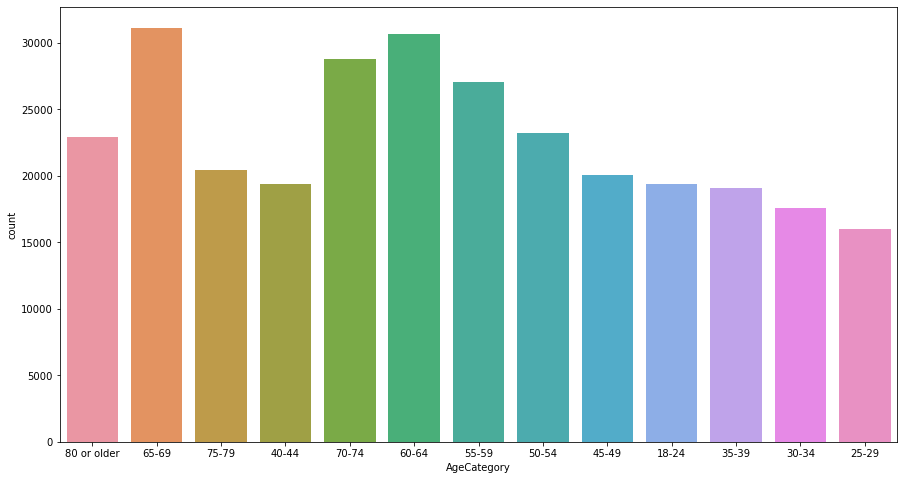

In [603]:
plt.figure(figsize=(15,8))
sns.countplot(dfc['AgeCategory'])
plt.show()

### Verificação de desbalanceamento do dataset

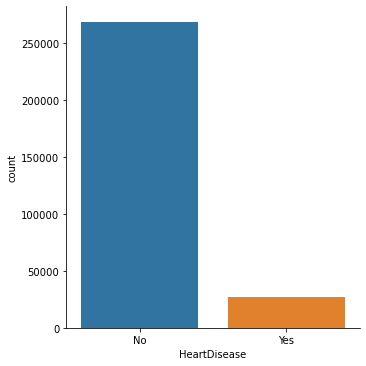

In [604]:
sns.catplot(data=dfc, x="HeartDisease", kind="count")

In [605]:
print('Negativos: ', len(dfc.loc[dfc['HeartDisease'] == 'No']))
print('Positivos: ', len(dfc.loc[dfc['HeartDisease'] == 'Yes']))

Negativos:  268993
Positivos:  26671


## Divisão de dados

In [606]:
train, test = train_test_split(dfc,
                               test_size = 0.2,
                               stratify = dfc['HeartDisease'],
                               random_state = 42)

Random under-sampling:
Yes    21337
No     21337
Name: HeartDisease, dtype: int64


<AxesSubplot:title={'center':'Count (target)'}>

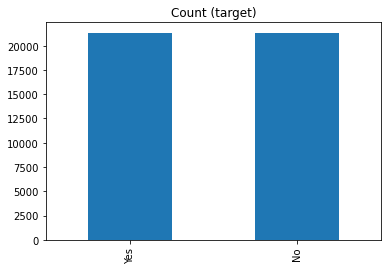

In [607]:
train_negative = train.loc[train['HeartDisease'] == 'No']
train_positive = train.loc[train['HeartDisease'] == 'Yes']

count_class_00, count_class_11 = train.HeartDisease.value_counts()

df_class_00_under = train_negative.sample(count_class_11)
df_train_underNEW = pd.concat([df_class_00_under, train_positive], axis=0)


print('Random under-sampling:')
print(df_train_underNEW.HeartDisease.value_counts())

df_train_underNEW.HeartDisease.value_counts().plot(kind='bar', title='Count (target)')

In [608]:
print(len(df_train_underNEW))
print(len(test))

42674
59133


In [609]:
number_features = len(df_train_underNEW.columns) - 1
print(number_features)

X_train = df_train_underNEW.drop('HeartDisease', axis=1)
y_train = df_train_underNEW['HeartDisease']

X_test = test.drop('HeartDisease', axis=1)

16


In [610]:
X_train

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
30953,29.05,No,No,No,0.0,0.0,No,Male,35-39,No,Yes,Very good,5.0,No,No,No
220306,35.44,No,No,Yes,15.0,4.0,No,Male,60-64,No,No,Fair,10.0,Yes,No,No
280769,33.09,Yes,No,No,0.0,0.0,No,Female,60-64,No,Yes,Very good,6.0,No,No,No
196132,29.29,Yes,No,No,0.0,0.0,No,Male,70-74,Yes,Yes,Excellent,8.0,No,No,No
114960,18.78,Yes,No,No,6.0,30.0,No,Female,60-64,No,Yes,Good,6.0,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227480,33.45,Yes,No,No,0.0,0.0,No,Male,55-59,No,No,Good,8.0,No,No,No
185575,20.81,Yes,Yes,No,0.0,0.0,No,Male,60-64,No,Yes,Poor,8.0,No,No,No
291773,22.24,Yes,No,No,0.0,0.0,No,Male,80 or older,No,Yes,Good,6.0,No,No,No
108268,34.02,Yes,No,No,0.0,0.0,No,Male,60-64,No,Yes,Fair,7.0,No,No,No


## Data encoding

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


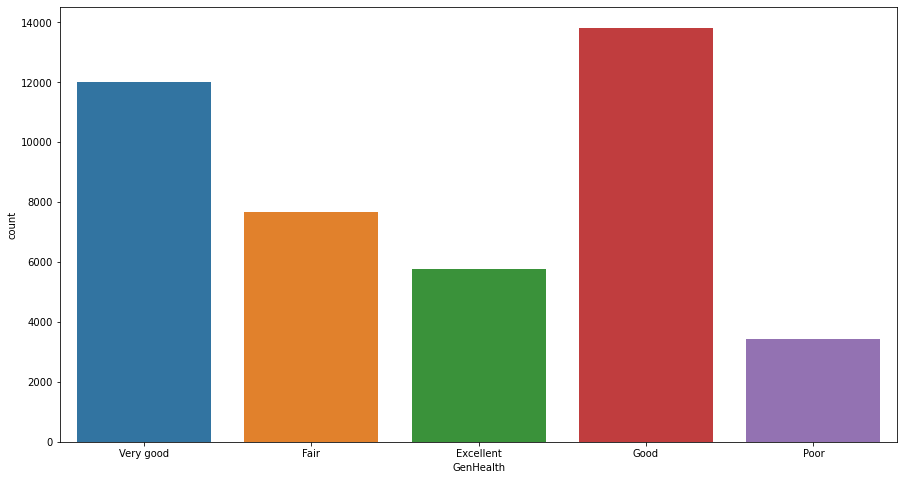

In [611]:
plt.figure(figsize=(15,8))
sns.countplot(X_train['GenHealth'])
plt.show()

### Data Encoding: Categorical variables to numerical variables

In [612]:
from tensorflow import feature_column
from sklearn.preprocessing import OneHotEncoder

#ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)

#def encondeTrainData(df, col):
    #data = pd.DataFrame(ohe.fit_transform(df[[col]]))
    #data_list = np.array(data.values.tolist())
    #df.drop(col, axis=1)
    #df[col] = data_list
    #return df


#avoid_features = ['Diabetic', 'Sex', 'GenHealth', 'AgeCategory', 
                 # 'BMI', 'MentalHealth', 'PhysicalHealth',
                # 'SleepTime']

#for col in X_train.columns:
    #if(col not in avoid_features):
        #X_train = encondeTrainData(X_train, col)

X_train['HeartDisease'] = y_train   
cols_YesNo_values = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity',
                       'Asthma', 'KidneyDisease', 'SkinCancer']

answers_values = {'No':0, 'Yes':1}
for i in range(0, len(cols_YesNo_values)):
    X_train[cols_YesNo_values[i]] = X_train[cols_YesNo_values[i]].replace(answers_values)        
        

y_train = X_train['HeartDisease']
X_train = X_train.drop('HeartDisease',axis=1)
#y_train_encoded = pd.DataFrame(ohe.fit_transform(X_train[['target']]))
#X_train = X_train.drop('target', axis=1)

#Ordinal encoding - GenHealth
genHealth = {'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4}
X_train['GenHealth'] = X_train['GenHealth'].replace(genHealth)

#Ordinal encoding - Diabetic
diabetic = {'No':0, 'No, borderline diabetes':1, 'Yes (during pregnancy)':2, 'Yes':3}
X_train['Diabetic'] = X_train['Diabetic'].replace(diabetic)

#Ordinal encoding - Sex
sex = {'Female':0, 'Male':1}
X_train['Sex'] = X_train['Sex'].replace(sex)

#Ordinal encoding - AgeCategory
ageCategory= {'18-24':0, '25-29':1, '30-34':2, '35-39':3, '40-44':4, '45-49':5, '50-54':6, '55-59':7, '60-64':8,
             '65-69':9, '70-74':10, '75-79':11, '80 or older':12}
X_train['AgeCategory'] = X_train['AgeCategory'].replace(ageCategory)

In [613]:
X_train

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
30953,29.05,0,0,0,0.0,0.0,0,1,3,0,1,3,5.0,0,0,0
220306,35.44,0,0,1,15.0,4.0,0,1,8,0,0,1,10.0,1,0,0
280769,33.09,1,0,0,0.0,0.0,0,0,8,0,1,3,6.0,0,0,0
196132,29.29,1,0,0,0.0,0.0,0,1,10,3,1,4,8.0,0,0,0
114960,18.78,1,0,0,6.0,30.0,0,0,8,0,1,2,6.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227480,33.45,1,0,0,0.0,0.0,0,1,7,0,0,2,8.0,0,0,0
185575,20.81,1,1,0,0.0,0.0,0,1,8,0,1,0,8.0,0,0,0
291773,22.24,1,0,0,0.0,0.0,0,1,12,0,1,2,6.0,0,0,0
108268,34.02,1,0,0,0.0,0.0,0,1,8,0,1,1,7.0,0,0,0


In [614]:
from tensorflow import feature_column
from sklearn.preprocessing import OneHotEncoder

#ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)

#def encodeData(df, col):
    #data = pd.DataFrame(ohe.fit_transform(df[[col]]))
    #data_list = np.array(data.values.tolist())
    #df.drop(col, axis=1)
    #df[col] = data_list
    #return df


#for col in X_test.columns:
    #if(col != 'GenHealth' and col != 'AgeCategory' and col != 'BMI' and col != 'MentalHealth' and col != 'PhysicalHealth'  and col != 'SleepTime'):
        #X_test = encodeData(X_test, col)

      
numeric_list_test = X_test.select_dtypes(include=[np.number]).columns
X_test[numeric_list_test] = X_test[numeric_list_test].astype(np.float32) 



X_test['HeartDisease'] = test['HeartDisease']   
cols_YesNo_values = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity',
                       'Asthma', 'KidneyDisease', 'SkinCancer']

answers_values = {'No':0, 'Yes':1}
for i in range(0, len(cols_YesNo_values)):
    X_test[cols_YesNo_values[i]] = X_test[cols_YesNo_values[i]].replace(answers_values)        
        

y_test = X_test['HeartDisease']
X_test = X_test.drop('HeartDisease',axis=1)
#y_train_encoded = pd.DataFrame(ohe.fit_transform(X_train[['target']]))
#X_train = X_train.drop('target', axis=1)

#Ordinal encoding - GenHealth
genHealth = {'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4}
X_test['GenHealth'] = X_test['GenHealth'].replace(genHealth)

#Ordinal encoding - Diabetic
diabetic = {'No':0, 'No, borderline diabetes':1, 'Yes (during pregnancy)':2, 'Yes':3}
X_test['Diabetic'] = X_test['Diabetic'].replace(diabetic)

#Ordinal encoding - Sex
sex = {'Female':0, 'Male':1}
X_test['Sex'] = X_test['Sex'].replace(sex)

#Ordinal encoding - AgeCategory
ageCategory= {'18-24':0, '25-29':1, '30-34':2, '35-39':3, '40-44':4, '45-49':5, '50-54':6, '55-59':7, '60-64':8,
             '65-69':9, '70-74':10, '75-79':11, '80 or older':12}
X_test['AgeCategory'] = X_test['AgeCategory'].replace(ageCategory)

In [615]:
X_test

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
254114,28.250000,1,1,0,1.0,4.0,0,0,3,2,1,3,7.0,0,0,0
107678,35.340000,1,1,0,0.0,0.0,0,1,5,0,1,4,8.0,0,0,0
117802,27.799999,1,0,0,0.0,0.0,0,1,6,0,1,3,6.0,0,0,0
182927,25.389999,0,0,0,0.0,0.0,0,0,8,0,1,3,7.0,1,0,0
32376,35.439999,0,0,0,0.0,0.0,0,0,9,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30079,24.209999,1,0,0,0.0,5.0,0,0,5,0,1,4,7.0,0,0,0
116509,27.120001,1,0,0,0.0,10.0,0,1,11,3,0,2,6.0,0,0,0
257587,32.919998,0,0,0,0.0,20.0,0,0,7,0,0,2,7.0,0,0,0
237233,28.250000,1,0,0,0.0,25.0,0,0,4,0,1,4,8.0,0,0,0


## Treinamento - Rede Neural

### Preparação do modelo

In [616]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

LR = 0.001
BETA1 = 0.9
BETA2 = 0.999
EPSILON = 1.0e-8
DECAY = 0.0
VAL_PERC = 0.4

opt = optimizers.Adam(lr=LR,
                      beta_1=BETA1,
                      beta_2=BETA2,
                      epsilon=EPSILON,
                      decay=DECAY)

loss = losses.binary_crossentropy
met = [metrics.binary_accuracy]

callbacks_list = [EarlyStopping(
        monitor='binary_accuracy',
        patience=10),]

D:\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


### Treino

In [617]:
model = Sequential()
model.add(Dense(20, input_dim=16, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))#linear

model.compile(loss=loss, optimizer=opt, metrics=met)


X_train['HeartDisease'] = y_train

training, validation = train_test_split(X_train,
                               test_size = 0.2,
                               stratify = X_train['HeartDisease'],
                               random_state = 42)

X_train = X_train.drop('HeartDisease',axis=1)

Y_training = training['HeartDisease']
X_training = training.drop('HeartDisease',axis=1)

Y_validation = validation['HeartDisease']
X_validation = validation.drop('HeartDisease',axis=1)

# fit the keras model on the dataset
history = model.fit(X_training, Y_training, epochs=50, batch_size=64, verbose=2, shuffle=True,
                    validation_data=(X_validation, Y_validation), callbacks=callbacks_list)

# evaluate on test set
yhat = model.predict(X_test)

Epoch 1/50
534/534 - 2s - loss: 0.5338 - binary_accuracy: 0.7352 - val_loss: 0.5180 - val_binary_accuracy: 0.7470 - 2s/epoch - 4ms/step
Epoch 2/50
534/534 - 2s - loss: 0.5131 - binary_accuracy: 0.7497 - val_loss: 0.5134 - val_binary_accuracy: 0.7522 - 2s/epoch - 3ms/step
Epoch 3/50
534/534 - 2s - loss: 0.5070 - binary_accuracy: 0.7530 - val_loss: 0.5268 - val_binary_accuracy: 0.7490 - 2s/epoch - 3ms/step
Epoch 4/50
534/534 - 2s - loss: 0.5059 - binary_accuracy: 0.7511 - val_loss: 0.5069 - val_binary_accuracy: 0.7541 - 2s/epoch - 3ms/step
Epoch 5/50
534/534 - 2s - loss: 0.5034 - binary_accuracy: 0.7557 - val_loss: 0.5051 - val_binary_accuracy: 0.7564 - 2s/epoch - 3ms/step
Epoch 6/50
534/534 - 2s - loss: 0.5039 - binary_accuracy: 0.7562 - val_loss: 0.5108 - val_binary_accuracy: 0.7489 - 2s/epoch - 3ms/step
Epoch 7/50
534/534 - 2s - loss: 0.5029 - binary_accuracy: 0.7559 - val_loss: 0.5050 - val_binary_accuracy: 0.7571 - 2s/epoch - 3ms/step
Epoch 8/50
534/534 - 2s - loss: 0.5013 - binary_

### Informações sobre o modelo

In [618]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 20)                340       
                                                                 
 dense_94 (Dense)            (None, 50)                1050      
                                                                 
 dense_95 (Dense)            (None, 256)               13056     
                                                                 
 dense_96 (Dense)            (None, 256)               65792     
                                                                 
 dense_97 (Dense)            (None, 10)                2570      
                                                                 
 dense_98 (Dense)            (None, 1)                 11        
                                                                 
Total params: 82,819
Trainable params: 82,819
Non-tra

## Resultados - Modelo 1 (Rede Neural)

In [619]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(y_test, yhat)
print('Mean Absolute Error: ', error)

Mean Absolute Error:  0.32279347262193325


In [620]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(scores)

[0.51112961769104, 0.7204099297523499]


In [621]:
from sklearn.metrics import precision_score
y_pred = model.predict(X_test)
#y_pred holds the probability of each data point from X_test

y_pred = (y_pred > 0.5)

precision = precision_score(y_test, y_pred)
#print('precision (test): ' + "%.2f%%" %  (precision*100))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1848/1848 [==============================] - 2s 1ms/step
binary_accuracy: 72.04%


1848/1848 [==============================] - 2s 1ms/step


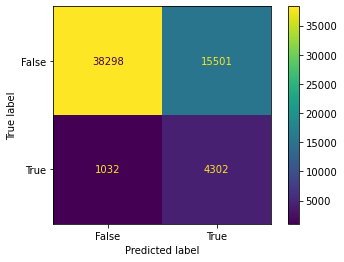

In [622]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
#y_pred holds the probability of each data point from X_test

y_pred = (y_pred > 0.5)

confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

## Learning Curves (Modelo - Rede Neural)

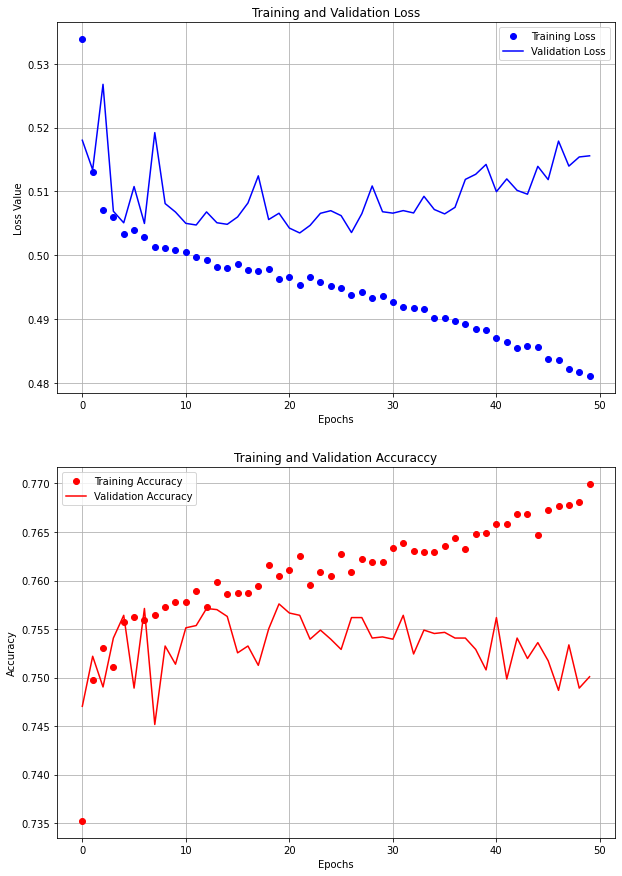

In [623]:
# learning curves
history_dict = history.history
history_dict.keys()

# losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# accuracies
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(50)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,15))

ax1.plot(epochs, loss_values, 'bo', label="Training Loss")
ax1.plot(epochs, val_loss_values, 'b', label="Validation Loss")
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss Value')
ax1.legend()
ax1.grid(True)

ax2.plot(epochs, acc_values, 'ro', label="Training Accuracy")
ax2.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
ax2.set_title('Training and Validation Accuraccy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

plt.show()

## Ajuste de Hiperparâmetros - Modelo Rede Neural

In [629]:
# fit the keras model on the dataset
history2 = model.fit(X_training, Y_training, epochs=140, batch_size=128, verbose=2, shuffle=True,
                    validation_data=(X_validation, Y_validation), callbacks=callbacks_list)

# evaluate on test set
yhat2 = model.predict(X_test)

Epoch 1/140
267/267 - 1s - loss: 0.2874 - binary_accuracy: 0.8684 - val_loss: 1.4928 - val_binary_accuracy: 0.7139 - 1s/epoch - 4ms/step
Epoch 2/140
267/267 - 1s - loss: 0.2858 - binary_accuracy: 0.8689 - val_loss: 1.5039 - val_binary_accuracy: 0.7182 - 1s/epoch - 4ms/step
Epoch 3/140
267/267 - 1s - loss: 0.2977 - binary_accuracy: 0.8646 - val_loss: 1.5349 - val_binary_accuracy: 0.7118 - 1s/epoch - 4ms/step
Epoch 4/140
267/267 - 1s - loss: 0.2942 - binary_accuracy: 0.8657 - val_loss: 1.4575 - val_binary_accuracy: 0.7118 - 1s/epoch - 4ms/step
Epoch 5/140
267/267 - 1s - loss: 0.2936 - binary_accuracy: 0.8654 - val_loss: 1.3785 - val_binary_accuracy: 0.7153 - 1s/epoch - 4ms/step
Epoch 6/140
267/267 - 1s - loss: 0.3057 - binary_accuracy: 0.8613 - val_loss: 1.4160 - val_binary_accuracy: 0.7139 - 1s/epoch - 4ms/step
Epoch 7/140
267/267 - 1s - loss: 0.2884 - binary_accuracy: 0.8685 - val_loss: 1.4353 - val_binary_accuracy: 0.7134 - 1s/epoch - 4ms/step
Epoch 8/140
267/267 - 1s - loss: 0.2976 -

### Resultados

In [625]:
error = mean_absolute_error(y_test, yhat2)
print('Mean Absolute Error: ', error)

Mean Absolute Error:  0.3166396107896707


In [626]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

binary_accuracy: 72.04%


ValueError: x and y must have same first dimension, but have shapes (140,) and (135,)

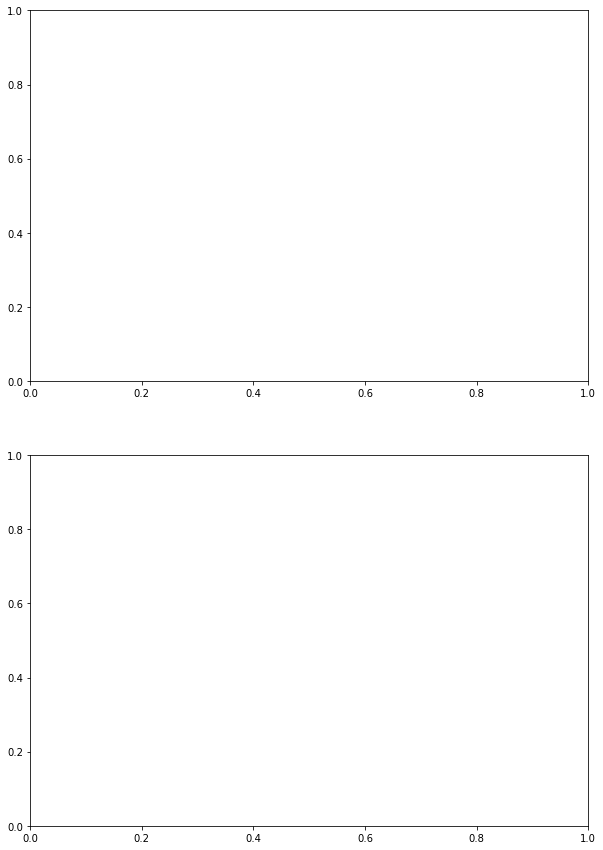

In [627]:
# learning curves
history_dict = history2.history
history_dict.keys()

# losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# accuracies
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(140)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,15))

ax1.plot(epochs, loss_values, 'bo', label="Training Loss")
ax1.plot(epochs, val_loss_values, 'b', label="Validation Loss")
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss Value')
ax1.legend()
ax1.grid(True)

ax2.plot(epochs, acc_values, 'ro', label="Training Accuracy")
ax2.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
ax2.set_title('Training and Validation Accuraccy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

plt.show()

## Modelos - RandomForest (Ensemble learning)

## Modelo 1

In [630]:
clf = RandomForestClassifier(max_depth=20, random_state=0, n_estimators=100,
                              min_samples_leaf = 2, min_samples_split = 5)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

### Acurácia - Modelo 1

In [631]:
acc = accuracy_score(y_hat,y_test)
print('Accuracy of K-nearest neighbors classifier in the training set:',"{:.3f}%".format(acc*100))

Accuracy of K-nearest neighbors classifier in the training set: 72.388%


### Matriz de Confusão - Modelo 1

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion matrix, without normalization')

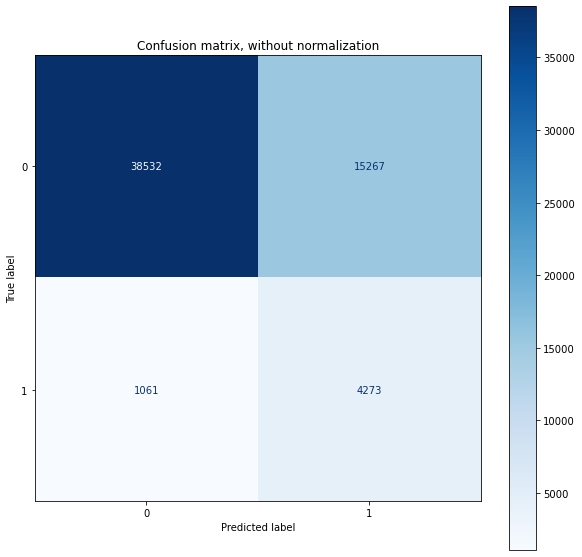

In [632]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(clf,
                                    X_test,
                                    y_test,
                                    cmap=plt.cm.Blues,
                                    normalize=None,
                                    ax=ax)
disp.ax_.set_title('Confusion matrix, without normalization')

## Modelo 2 - Ajuste de hiperparâmetro (max_depth=4, random_state=0)

In [633]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(max_depth=50, random_state=0, n_estimators=200,
                              min_samples_leaf = 3, min_samples_split = 8)
clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=3, min_samples_split=8,
                       n_estimators=200, random_state=0)

### Acurácia - Modelo 2

In [634]:
y_hat2 = clf2.predict(X_test)
acc = accuracy_score(y_hat2,y_test)
print('Accuracy of K-nearest neighbors classifier in the training set:',"{:.3f}%".format(acc*100))

Accuracy of K-nearest neighbors classifier in the training set: 72.180%


### Matriz de Confusão - Modelo 2

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion matrix, without normalization')

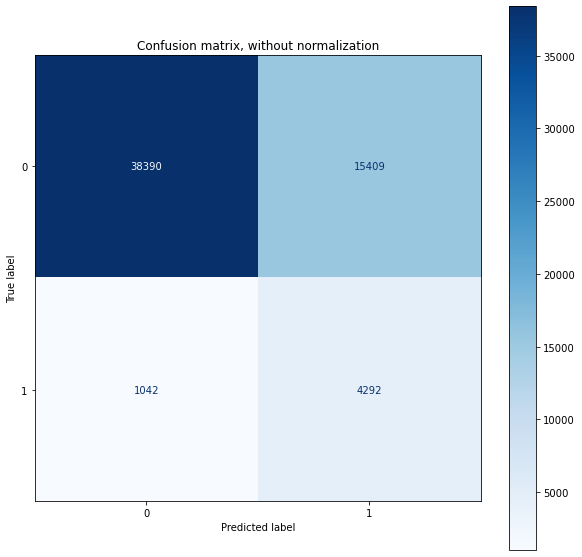

In [635]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(clf2,
                                    X_test,
                                    y_test,
                                    cmap=plt.cm.Blues,
                                    normalize=None,
                                    ax=ax)
disp.ax_.set_title('Confusion matrix, without normalization')

## Modelo 3 - Ajuste de hiperparâmetro (max_depth=16, random_state=2)

In [636]:
clf4 = RandomForestClassifier(max_depth=80, random_state=0, n_estimators=400, 
                              min_samples_leaf = 4, min_samples_split = 10)
clf4.fit(X_train, y_train)

RandomForestClassifier(max_depth=80, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=400, random_state=0)

### Acurácia - Modelo 3

In [637]:
y_hat4 = clf4.predict(X_test)
acc = accuracy_score(y_hat4,y_test)
print('Accuracy of K-nearest neighbors classifier in the training set:',"{:.3f}%".format(acc*100))

Accuracy of K-nearest neighbors classifier in the training set: 72.269%


### Matriz de Confusão - Modelo 3

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion matrix, without normalization')

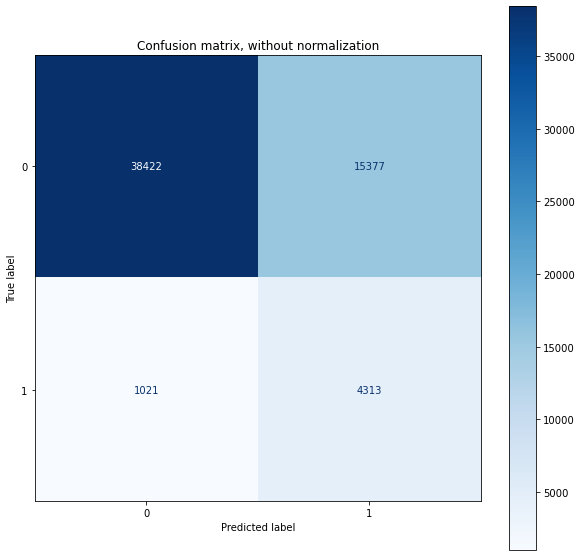

In [638]:
from sklearn.metrics import plot_confusion_matrix

#cn = X_test.columns

fig, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(clf4,
                                    X_test,
                                    y_test,
                                    #display_labels=cn,
                                    cmap=plt.cm.Blues,
                                    normalize=None,
                                    ax=ax)
disp.ax_.set_title('Confusion matrix, without normalization')

In [639]:
print(len(X_train))
print(len(X_test))

42674
59133


In [640]:
print(len(validation))
print(len(training))
print(len(X_test))

8535
34139
59133
